In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

img_folder_path = '/content/drive/My Drive/Satellite data/data_processed/test'
dirListing = os.listdir(img_folder_path)

print(len(dirListing))

7325


In [3]:
cd 'drive/My Drive/Satellite data'

/content/drive/My Drive/Satellite data


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback

In [0]:
np.random.seed(2)

In [0]:
data = ImageDataBunch.from_folder('/content/drive/My Drive/Satellite data/data_processed/train',train='', test = '/content/drive/My Drive/Satellite data/data_processed/test',valid_pct = 0.2,  ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.), 
                              size=128, bs=32).normalize(imagenet_stats)

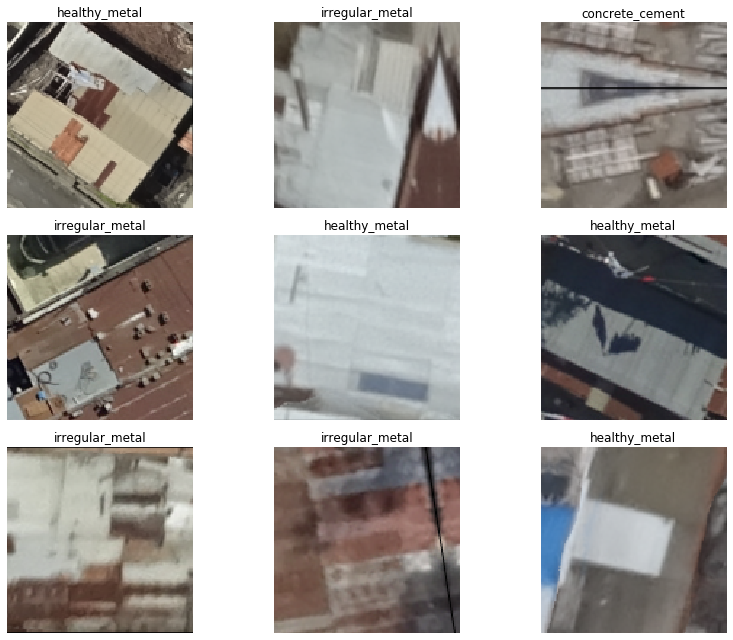

In [8]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
print(data.classes)
#data.save('databunch1')

['concrete_cement', 'healthy_metal', 'incomplete', 'irregular_metal', 'other']


In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [10]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (11896 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
concrete_cement,concrete_cement,concrete_cement,concrete_cement,concrete_cement
Path: /content/drive/My Drive/Satellite data/data_processed/train;

Valid: LabelList (2974 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
incomplete,irregular_metal,irregular_metal,healthy_metal,incomplete
Path: /content/drive/My Drive/Satellite data/data_processed/train;

Test: LabelList (7325 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Satellite data/data_processed/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): Bat

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [0]:
learn.fit_one_cycle(4, callbacks=[SaveModelCallback(learn)])

epoch,train_loss,valid_loss,error_rate,time
0,1.037767,0.804236,0.293544,49:29
1,0.747164,0.662332,0.250841,02:24
2,0.666948,0.592694,0.227303,02:14
3,0.601646,0.570328,0.215871,02:14


Better model found at epoch 0 with valid_loss value: 0.8042364120483398.
Better model found at epoch 1 with valid_loss value: 0.6623315811157227.
Better model found at epoch 2 with valid_loss value: 0.5926936268806458.
Better model found at epoch 3 with valid_loss value: 0.5703279972076416.


In [0]:
learn.save('stage-1 v1 -50')

In [0]:
pwd

'/content/drive/My Drive/Satellite data'

In [0]:
learn.fit_one_cycle(2, callbacks=[SaveModelCallback(learn)])

epoch,train_loss,valid_loss,error_rate,time
0,0.673233,0.621204,0.251177,02:22
1,0.590603,0.551869,0.215535,02:22


Better model found at epoch 0 with valid_loss value: 0.621204137802124.
Better model found at epoch 1 with valid_loss value: 0.5518687963485718.


In [0]:
img = learn.data.test_ds[0][0]
print(np.array(learn.predict(img)[2]))

[0.001066 0.958438 0.001195 0.037585 0.001716]


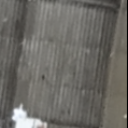

In [0]:
learn.data.test_ds[0][0]

In [0]:
preds, y = learn.get_preds(DatasetType.Test)

In [0]:
import pandas as pd
df_test = pd.read_csv('testResults.csv')

In [14]:
df_test.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.000381,0.996386,0.000005,0.003127,0.000101
1,7a4bbbd6,0.020826,0.937957,0.004498,0.027691,0.009029
2,7a4ac744,0.004408,0.679267,0.007258,0.308397,0.000670
3,7a4881fa,0.000219,0.310672,0.000530,0.688543,0.000035
4,7a4aa4a8,0.004629,0.837616,0.001111,0.156469,0.000176


In [13]:
for i in range(len(df_test)):
  img = open_image('data_processed/test/'+df_test['id'][i]+'.tif')
  ar = np.array(learn.predict(img)[2])
  df_test['concrete_cement'][i] = ar[0]
  df_test['healthy_metal'][i] = ar[1]
  df_test['incomplete'][i] = ar[2]
  df_test['irregular_metal'][i] = ar[3]
  df_test['other'][i] = ar[4]

df_test.to_csv('submission1.csv')


Output hidden; open in https://colab.research.google.com to view.